In [304]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import pickle as pkl
import joblib

In [305]:
data = pd.read_csv('pimadataorig.csv')

In [306]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_preg,768.0,4.278646,3.021516,1.000,2.00000,3.0000,6.00000,17.00
glucose_conc,768.0,121.681605,30.436016,44.000,99.75000,117.0000,140.25000,199.00
diastolic_bp,768.0,72.254807,12.115932,24.000,64.00000,72.0000,80.00000,122.00
skin_thickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
bmi,768.0,32.450805,6.875374,18.200,27.50000,32.0000,36.60000,67.10
diab_pred,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
diabetes,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [307]:
data

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [308]:
median = ['num_preg', 'skin_thickness', 'insulin'] #asymetric distribution: ganti nilai 0 dengan median
mean = ['glucose_conc', 'diastolic_bp', 'bmi'] #symetric distribution: ganti nilai 0 dengan mean

In [309]:
def replace_zero(df, column_name, fill):
    if fill=='median':
        fill_value = df[column_name].median()
    elif fill=='mean':
        fill_value = df[column_name].mean()
    df[column_name] = df[column_name].replace(0, fill_value)
    return df

In [310]:
for col in median:
    df = replace_zero(df, col, 'median')
    
for col in mean:
    df = replace_zero(df, col, 'mean')

In [311]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
num_preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose_conc,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
diastolic_bp,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin_thickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
diab_pred,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
diabetes,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


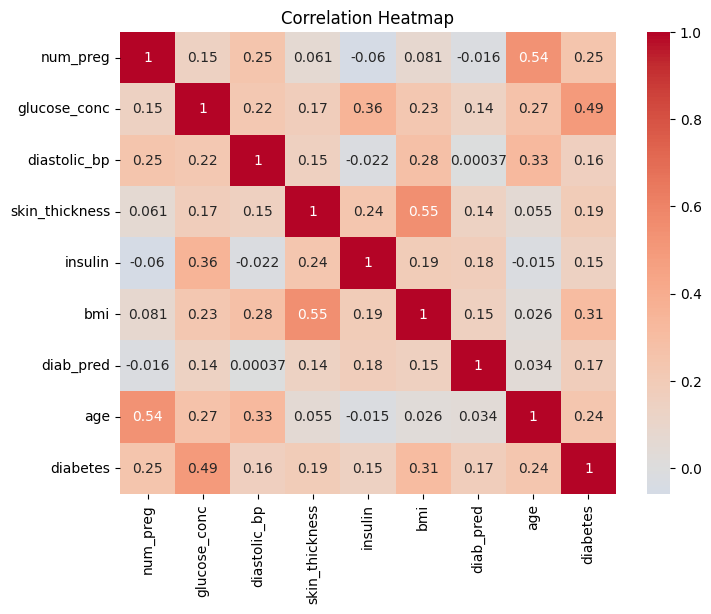

In [312]:
plt.figure(figsize=(8, 6))  # Set the size of the plot
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [313]:
X = df[['num_preg', 'glucose_conc', 'diastolic_bp', 'skin_thickness', 'insulin', 'bmi', 'diab_pred', 'age']]
y = df['diabetes']

In [314]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

In [315]:
X_train.shape, X_test.shape

((614, 8), (154, 8))

In [316]:
scaler = MinMaxScaler()
scaler.fit(X_train) #lakukan fit pada X_train jangan libatkan X_test
X_train = scaler.transform(X_train)

In [317]:
X_test = scaler.transform(X_test)

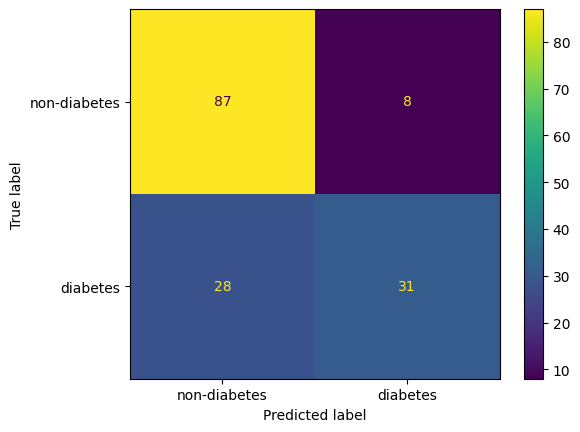

In [318]:
def plot_confusion_matrix(y_true, y_preds):
    cm = confusion_matrix(y_true, y_preds)
    cmd = ConfusionMatrixDisplay(cm, display_labels=['non-diabetes', 'diabetes'])
    cmd.plot()
    
plot_confusion_matrix(y_test, y_test_pred_logistic)

In [319]:
def train_and_report(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print("Classification report for train")
    print(classification_report(y_train, y_train_pred))
    print('-'*100)

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_test_pred_logistic = logistic_model.predict(X_test)

print("Logistic Regression:")
print("Classification Report for Test:")
print(classification_report(y_test, y_test_pred_logistic))
print("Confusion Matrix for Test:")
print("="*100)
print('recall_score\t:', recall_score(y_test, y_test_pred_logistic))
print('precision_score\t:', precision_score(y_test, y_test_pred_logistic))
print('accuracy_score\t:', accuracy_score(y_test, y_test_pred_logistic))

Logistic Regression:
Classification Report for Test:
              precision    recall  f1-score   support

           0       0.76      0.92      0.83        95
           1       0.79      0.53      0.63        59

    accuracy                           0.77       154
   macro avg       0.78      0.72      0.73       154
weighted avg       0.77      0.77      0.75       154

Confusion Matrix for Test:
recall_score	: 0.5254237288135594
precision_score	: 0.7948717948717948
accuracy_score	: 0.7662337662337663


In [320]:
def train_and_report(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print("Classification report for train")
    print(classification_report(y_train, y_train_pred))
    print('-'*100)

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_test_pred_dt = decision_tree_model.predict(X_test)

print("Decision Tree:")
print("Classification Report for Test:")
print(classification_report(y_test, y_test_pred_dt))
print("="*100)
print('recall_score\t:', recall_score(y_test, y_test_pred_dt))
print('precision_score\t:', precision_score(y_test, y_test_pred_dt))
print('accuracy_score\t:', accuracy_score(y_test, y_test_pred_dt))

Decision Tree:
Classification Report for Test:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79        95
           1       0.66      0.63      0.64        59

    accuracy                           0.73       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.73      0.73      0.73       154

recall_score	: 0.6271186440677966
precision_score	: 0.6607142857142857
accuracy_score	: 0.7337662337662337


In [321]:
def train_and_report(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print("Classification report for train")
    print(classification_report(y_train, y_train_pred))
    print('-'*100)

random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
y_test_pred_rf = random_forest_model.predict(X_test)

print("Random Forest:")
print("Classification Report for Test:")
print(classification_report(y_test, y_test_pred_rf))
print("Confusion Matrix for Test:")
print(confusion_matrix(y_test, y_test_pred_rf))
print("="*100)
print('recall_score\t:', recall_score(y_test, y_test_pred_rf))
print('precision_score\t:', precision_score(y_test, y_test_pred_rf))
print('accuracy_score\t:', accuracy_score(y_test, y_test_pred_rf))

Random Forest:
Classification Report for Test:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        95
           1       0.76      0.59      0.67        59

    accuracy                           0.77       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.77      0.77      0.77       154

Confusion Matrix for Test:
[[84 11]
 [24 35]]
recall_score	: 0.5932203389830508
precision_score	: 0.7608695652173914
accuracy_score	: 0.7727272727272727


In [322]:
def train_and_report(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print("Classification report for train")
    print(classification_report(y_train, y_train_pred))
    print('-'*100)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_test_pred_knn = knn_model.predict(X_test)

print("K-Nearest Neighbors (KNN):")
print("Classification Report for Test:")
print(classification_report(y_test, y_test_pred_knn))
print("="*100)
print('recall_score\t:', recall_score(y_test, y_test_pred_knn))
print('precision_score\t:', precision_score(y_test, y_test_pred_knn))
print('accuracy_score\t:', accuracy_score(y_test, y_test_pred_knn))

K-Nearest Neighbors (KNN):
Classification Report for Test:
              precision    recall  f1-score   support

           0       0.72      0.80      0.76        95
           1       0.60      0.49      0.54        59

    accuracy                           0.68       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.67      0.68      0.67       154

recall_score	: 0.4915254237288136
precision_score	: 0.6041666666666666
accuracy_score	: 0.6818181818181818


In [323]:
def train_and_report(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print("Classification report for train")
    print(classification_report(y_train, y_train_pred))
    print('-'*100)

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
y_test_pred_nb = naive_bayes_model.predict(X_test)

print("Naive Bayes:")
print("Classification Report for Test:")
print(classification_report(y_test, y_test_pred_nb))
print("Confusion Matrix for Test:")
print(confusion_matrix(y_test, y_test_pred_nb))
print("="*100)
print('recall_score\t:', recall_score(y_test, y_test_pred_nb))
print('precision_score\t:', precision_score(y_test, y_test_pred_nb))
print('accuracy_score\t:', accuracy_score(y_test, y_test_pred_nb))

Naive Bayes:
Classification Report for Test:
              precision    recall  f1-score   support

           0       0.75      0.79      0.77        95
           1       0.63      0.58      0.60        59

    accuracy                           0.71       154
   macro avg       0.69      0.68      0.69       154
weighted avg       0.70      0.71      0.71       154

Confusion Matrix for Test:
[[75 20]
 [25 34]]
recall_score	: 0.576271186440678
precision_score	: 0.6296296296296297
accuracy_score	: 0.7077922077922078


## Parameter Tuning

### Greedy Search

In [324]:
records = []
for w in ['uniform', 'distance']:
    for n in range (1, 10):
        model = KNeighborsClassifier(n_neighbors=n)
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        recall_test = recall_score(y_test, y_test_pred)
        records.append({
            'weight' : w, 'n_neighbors': n, 'recall' : recall_test
        })

In [325]:
pd.DataFrame(records).sort_values('recall', ascending=False).head()

,weight,n_neighbors,recall
0,uniform,1,0.576271
9,distance,1,0.576271
8,uniform,9,0.525424
17,distance,9,0.525424
4,uniform,5,0.491525


In [326]:
param_grid = {
    'n_neighbors': list(range(1, 20)),
    'weights' : ['uniform', 'distance']
}
model = KNeighborsClassifier()
grid_search = GridSearchCV(
    estimator = model, param_grid = param_grid, scoring='recall', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [327]:
grid_search.best_params_, grid_search.best_score_

({'n_neighbors': 5, 'weights': 'distance'}, 0.5793263646922184)

In [328]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_neighbors': list(range(1, 20)),
    'weights': ['uniform', 'distance']
}
model = KNeighborsClassifier()
random_search = RandomizedSearchCV(
    estimator=model, param_distributions=param_dist, scoring='recall', cv=5, n_iter=10)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19],
                                        'weights': ['uniform', 'distance']},
                   scoring='recall')

In [329]:
random_search.best_params_, random_search.best_score_

({'weights': 'uniform', 'n_neighbors': 5}, 0.5745644599303137)

In [333]:
model = KNeighborsClassifier(**grid_search.best_params_)
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
recall_score(y_test, y_pred_test)

0.4915254237288136

In [334]:
import pickle as pkl
import joblib

In [335]:
with open('model_modelan.pkl', 'wb') as f:
    pkl.dump(model, f)

In [337]:
with open('model_modelan.pkl', 'rb') as f:
    model_1 = pkl.load(f)

In [338]:
model

KNeighborsClassifier(weights='distance')